In [2]:
import torch
import torchvision
import torch.utils.data as Data
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import time
starttime = time.time()

torch.manual_seed(1)   #为了使用同样的随机初始化种子以形成相同的随机效果

EPOCH = 10
BATCH_SIZE = 64
LR = 0.005
N_TEST_IMG = 5

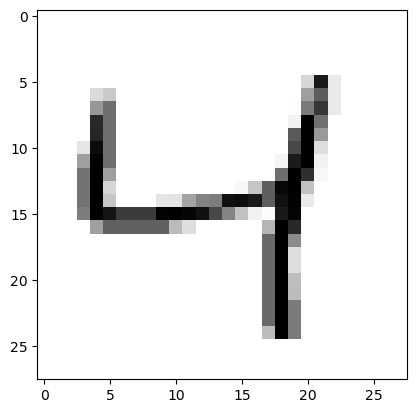

In [7]:
train_data = torchvision.datasets.MNIST(
    root='MINIST',
    train=True,
    transform=torchvision.transforms.ToTensor(),
    download=True
)
loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
plt.imshow(train_data.train_data[2].numpy(),cmap='Greys')

In [9]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Linear(64, 32),
            nn.Tanh(),
            nn.Linear(32, 16),
            nn.Tanh(),
            nn.Linear(16, 3)
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 16),
            nn.Tanh(),
            nn.Linear(16, 32),
            nn.Tanh(),
            nn.Linear(32, 64),
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()
        )
            
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [10]:
Coder = AutoEncoder()
print(Coder)

optimizer = torch.optim.Adam(Coder.parameters(), lr=LR)
loss_func = nn.MSELoss()

for epoch in range(EPOCH):
    for step,(x,y) in enumerate(loader):
        b_x = x.view(-1, 28*28)
        b_y = x.view(-1, 28*28)
        b_label = y
        encoded, decoded = Coder(b_x)
        loss = loss_func(decoded, b_y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step % 5 == 0:
            print('\rEpoch :', epoch,'|','train_loss:%.4f'%loss.data)

torch.save(Coder, "AutoEncoder.pkl")
print('________________________________________')
print('finish training')

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): Tanh()
    (6): Linear(in_features=32, out_features=16, bias=True)
    (7): Tanh()
    (8): Linear(in_features=16, out_features=3, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=16, bias=True)
    (1): Tanh()
    (2): Linear(in_features=16, out_features=32, bias=True)
    (3): Tanh()
    (4): Linear(in_features=32, out_features=64, bias=True)
    (5): Tanh()
    (6): Linear(in_features=64, out_features=128, bias=True)
    (7): Tanh()
    (8): Linear(in_features=128, out_features=784, bias=True)
    (9): Sigmoid()
  )
)
Epoch : 0 | train_loss:0.2316
Epoch : 0 | train_loss:0.1076
Epoch : 0 | train_loss:0.0702
Epoch : 0 | train_loss:0.0733
Epoch : 0 | train_loss:0.0676
Epoch : 0 | train_loss:0.0

In [24]:

%matplotlib inline
view_data = train_data.train_data[:200].view(-1, 28*28).type(torch.FloatTensor)/255.
encoded_data, _ = Coder(view_data)    # 提取压缩的特征值
fig = plt.figure()
ax = Axes3D(fig)    # 3D 图
# x, y, z 的数据值
X = encoded_data.data[:, 0].numpy()
Y = encoded_data.data[:, 1].numpy()
Z = encoded_data.data[:, 2].numpy()
# print(X[0],Y[0],Z[0])
values = train_data.train_labels[:200].numpy()  # 标签值

    
ax.text(1, 1, 1, 1)  # 标位子
ax.set_xlim(X.min(), X.max())
ax.set_ylim(Y.min(), Y.max())
ax.set_zlim(Z.min(), Z.max())
plt.show()

<Figure size 640x480 with 0 Axes>

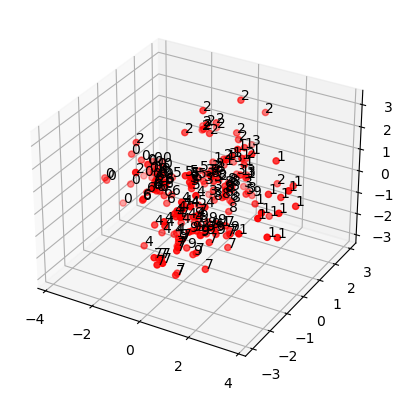

In [29]:
ax = plt.figure().add_subplot(111,projection='3d')
ax.scatter(X, Y, Z,c='r',marker='o')
for x, y, z, s in zip(X, Y, Z, values):
    ax.text(x,y,z,s)

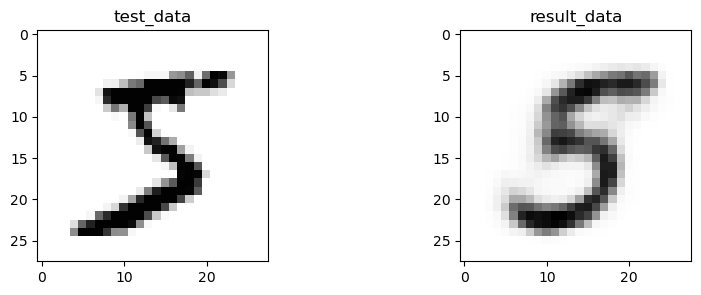

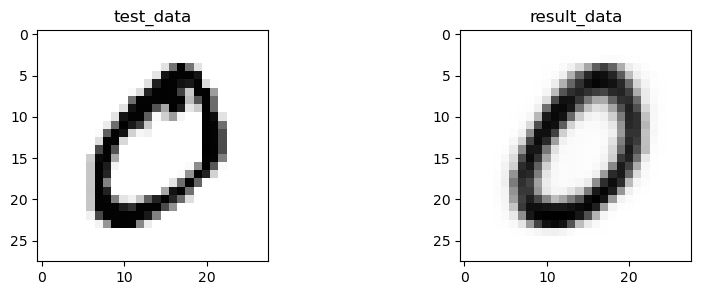

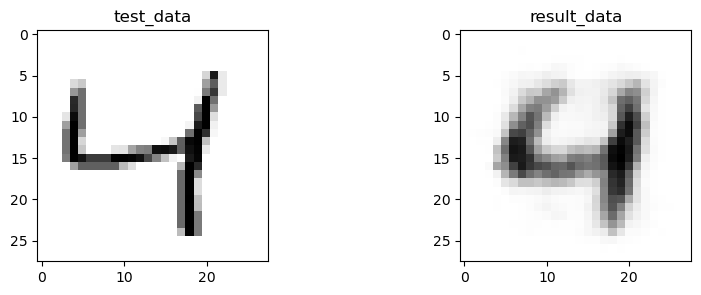

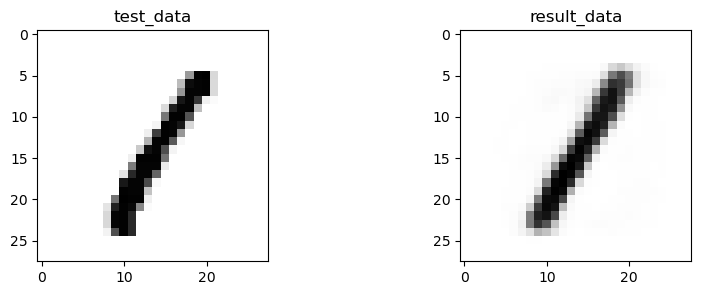

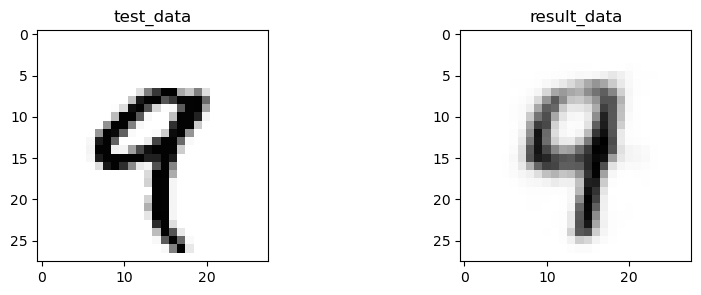

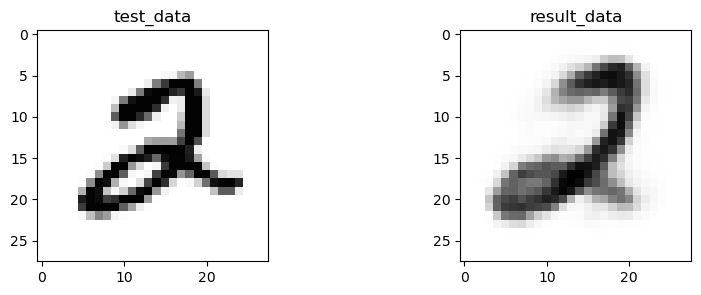

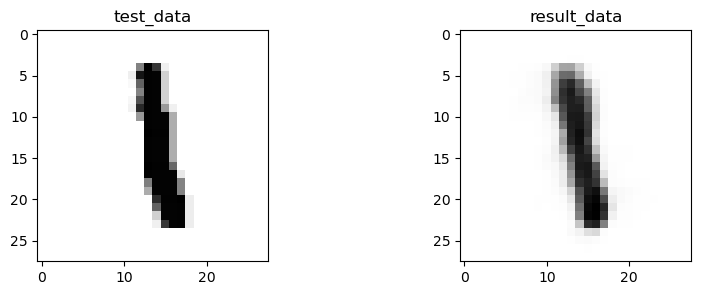

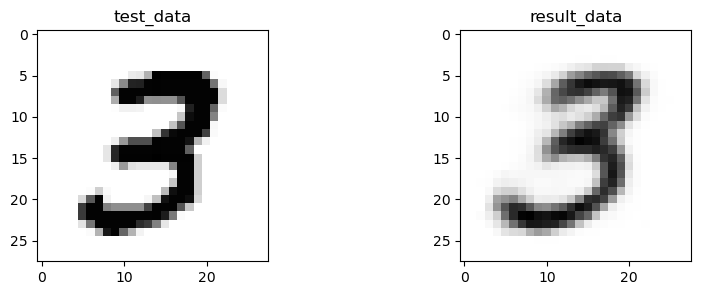

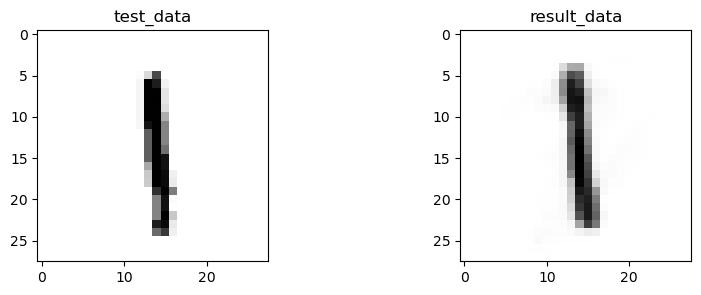

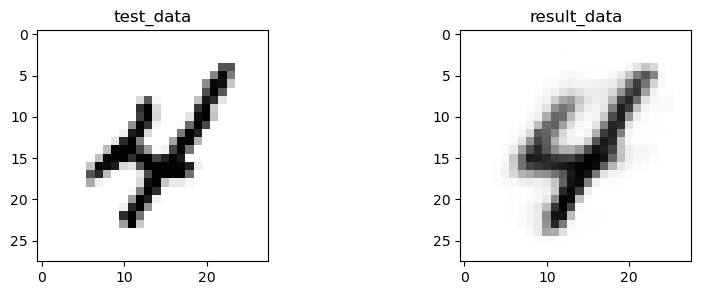

In [30]:
#原数据和生成数据的比较
plt.ion()
plt.show()


for i in range(10):
    test_data = train_data.train_data[i].view(-1,28*28).type(torch.FloatTensor)/255.
    _,result = Coder(test_data)
    # print('输入的数据的维度', train_data.train_data[i].size())
    # print('输出的结果的维度',result.size())

    im_result = result.view(28,28)
    # print(im_result.size())
    plt.figure(1, figsize=(10, 3))
    plt.subplot(121)
    plt.title('test_data')
    plt.imshow(train_data.train_data[i].numpy(),cmap='Greys')

    plt.figure(1, figsize=(10, 3))
    plt.subplot(122)
    plt.title('result_data')
    plt.imshow(im_result.detach().numpy(), cmap='Greys')
    plt.show()
    plt.pause(0.5)

plt.ioff()